In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import mlflow

color_pal = sns.color_palette()
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.duplicated().sum()

1081

In [ ]:
df2 = df.drop_duplicates()

In [ ]:
df2.duplicated().sum()

0

In [ ]:
df2.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

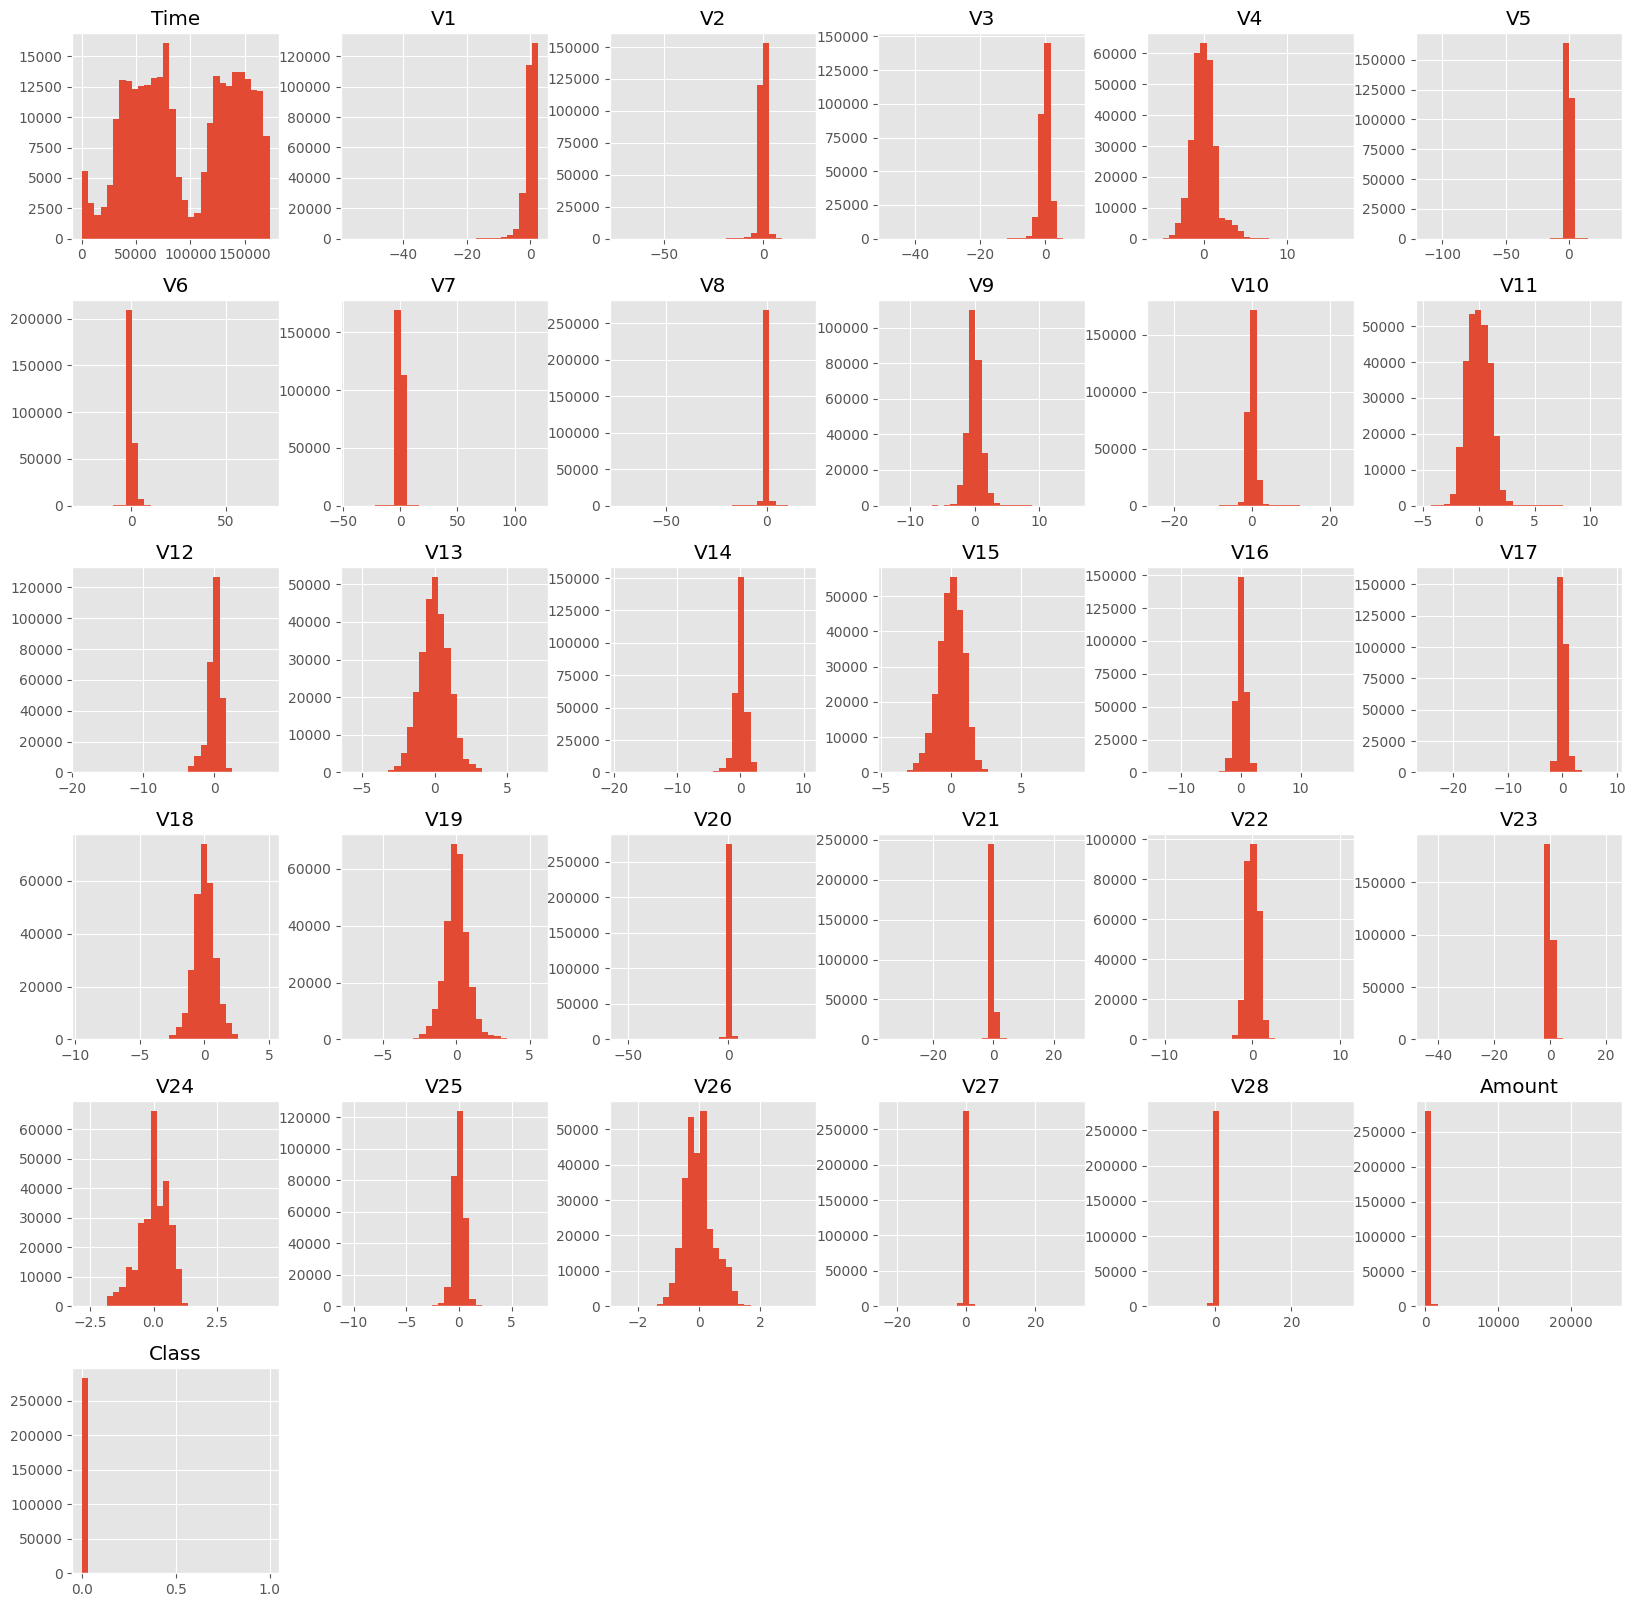

In [ ]:
df2.hist(bins = 30,  figsize = (20,20))

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
new_df = df2.copy()
new_df['Amount'] = rs.fit_transform(new_df['Amount'].to_numpy().reshape(-1,1))

array([[<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Amount'}>]], dtype=object)

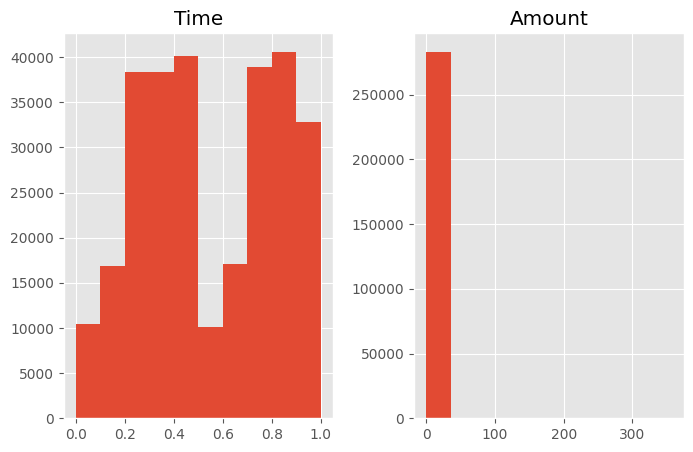

In [ ]:
time = new_df['Time']
new_df['Time'] = (time - time.min())/(time.max()-time.min())
new_df[['Time','Amount']].hist(bins = 10, figsize = (8,5))

In [ ]:
int(np.round(new_df.shape[0]*0.6,0))

170236

In [ ]:
train, val, test = new_df[:160000], new_df[160000:180000], new_df[180000:]

In [ ]:
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0    159662
 1       338
 Name: count, dtype: int64,
 Class
 0    103599
 1       127
 Name: count, dtype: int64,
 Class
 0    19992
 1        8
 Name: count, dtype: int64)

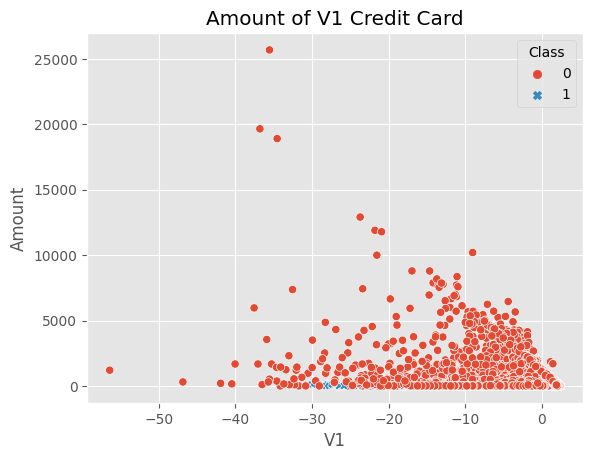

In [ ]:
sns.scatterplot(df, x = 'V1',  y = 'Amount', hue='Class', style = 'Class')
plt.title('Amount of V1 Credit Card')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
dtc = DecisionTreeClassifier()
X_train, X_test = train.drop('Class', axis = 1), test.drop('Class',  axis = 1)
y_train, y_test = train['Class'], test['Class']
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    103599
           1       0.35      0.65      0.46       127

    accuracy                           1.00    103726
   macro avg       0.68      0.83      0.73    103726
weighted avg       1.00      1.00      1.00    103726



In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
X_test_smt, y_test_smt = smt.fit_resample(X_test, y_test)
print('Before:', y_train.value_counts())
print('After:', y_train_smt.value_counts())

Before: Class
0    159662
1       338
Name: count, dtype: int64
After: Class
0    159662
1    159662
Name: count, dtype: int64


In [ ]:
dtc.fit(X_train_smt, y_train_smt)
y_pred_smt = dtc.predict(X_test_smt)
print(classification_report(y_test_smt, y_pred_smt, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.50      1.00      0.67    103599
       Fraud       0.89      0.02      0.03    103599

    accuracy                           0.51    207198
   macro avg       0.70      0.51      0.35    207198
weighted avg       0.70      0.51      0.35    207198



<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

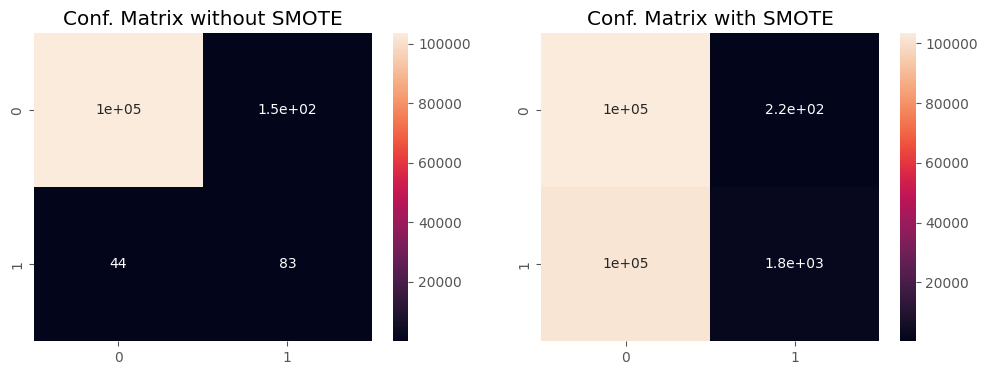

In [ ]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2, figsize = (12,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, ax=ax[0])
ax[0].set_title('Conf. Matrix without SMOTE')
sns.heatmap(confusion_matrix(y_test_smt, y_pred_smt), annot = True,  ax = ax[1])
ax[1].set_title('Conf. Matrix with SMOTE')
plt.tight_layout

In [ ]:
from keras.layers import InputLayer, BatchNormalization, Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

X_val = val.drop('Class', axis = 1)
y_val = val['Class']

nn = Sequential()
nn.add(InputLayer((X_train.shape[1],)))
nn.add(Dense(3, 'relu'))
nn.add(BatchNormalization())
nn.add(Dense(1,'sigmoid'))

checkpoint = ModelCheckpoint('NNmodel.keras', save_best_only=True)
nn.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              93 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109 (436.00 B)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 6 (24.00 B)

In [ ]:
X_train.shape

(160000, 30)

In [ ]:
# Non SMOTE Method
nn.fit(X_train, y_train, epochs = 5, callbacks = checkpoint, validation_data = (X_val, y_val))

Epoch 1/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9268 - loss: 0.2091 - val_accuracy: 0.9999 - val_loss: 0.0015
Epoch 2/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9991 - loss: 0.0043 - val_accuracy: 0.9998 - val_loss: 0.0014
Epoch 3/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9997 - val_loss: 0.0019
Epoch 4/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.9998 - val_loss: 0.0017
Epoch 5/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9998 - val_loss: 0.0014


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = (nn.predict(X_test).flatten()>0.5).astype(int)

3242/3242 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


In [ ]:
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00    103599
       Fraud       0.95      0.72      0.82       127

    accuracy                           1.00    103726
   macro avg       0.97      0.86      0.91    103726
weighted avg       1.00      1.00      1.00    103726



In [ ]:
# SMOTE Method
X_val_smt, y_val_smt = smt.fit_resample(X_val, y_val)
history = nn.fit(X_train_smt, y_train_smt, epochs = 10, callbacks=checkpoint, validation_data=(X_val_smt, y_val_smt))

Epoch 1/10
9979/9979 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - accuracy: 0.9679 - loss: 0.0796 - val_accuracy: 0.9645 - val_loss: 0.2310
Epoch 2/10
9979/9979 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9678 - loss: 0.0805 - val_accuracy: 0.9660 - val_loss: 0.2069
Epoch 3/10
9979/9979 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9678 - loss: 0.0804 - val_accuracy: 0.9652 - val_loss: 0.2389
Epoch 4/10
9979/9979 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9681 - loss: 0.0797 - val_accuracy: 0.9663 - val_loss: 0.2371
Epoch 5/10
9979/9979 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9690 - loss: 0.0779 - val_accuracy: 0.9663 - val_loss: 0.2347
Epoch 6/10
9979/9979 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9680 - loss: 0.0800 - val_accuracy: 0.9671 - val_loss: 0.2389
Epoch 7/10
9979/9979 ━━━━━━━━━━━━━━━━━━━━ 65s 6ms/step - accuracy: 0.9694 - loss: 0.0772 - val_accuracy: 0.9645 - val_loss: 0.2482
Epoch 8/10
9979/9979 ━━━━━━━━━━━━━━━━━━━━ 56s 6ms/step - accuracy: 0.9682 - loss: 0

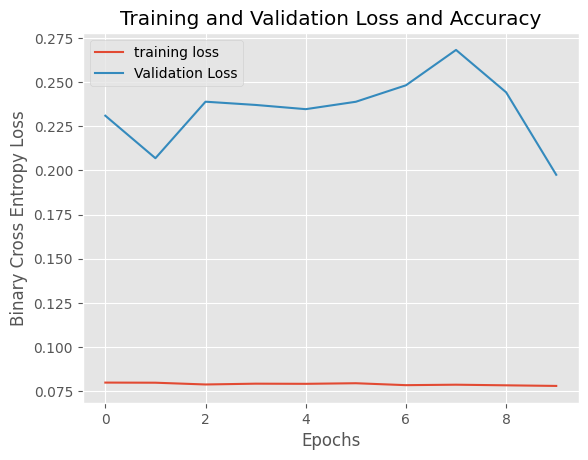

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Training and Validation Loss and Accuracy')
plt.legend()
plt.show()

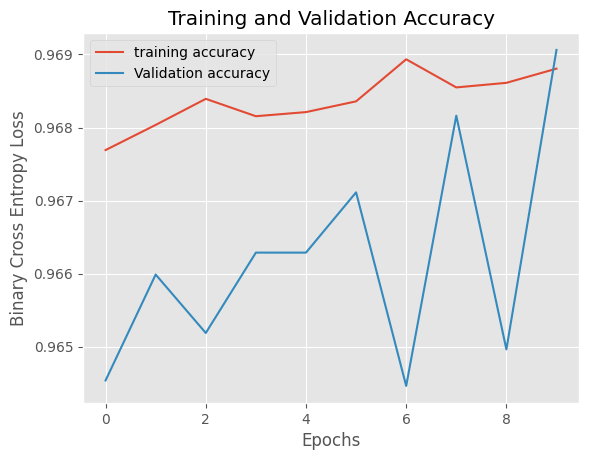

In [ ]:
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
mlflow.A